# Roh, Feb, 2020
# hyunwoo@uchicago.edu

# Replicate Ole Peters's work
# Time for a Change: Introducing irreversible time in economics

[Click here for the original presentation](https://s3-eu-west-1.amazonaws.com/content.gresham.ac.uk/data/binary/882/22nov12olepeters_timeforachange_presentation.pdf)

In [ ]:
import random
import sys
from time import time
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl # save python objects
np.random.seed(2020)

In [ ]:
def get_sim(n_time, init, gain = 0.5, loss = 0.4):
    
    money = init
    df = np.empty([n_time+1], dtype=np.float32)
    df[0] = money
    
    for i in range(n_time):

        coin_toss = np.random.randint(0,2)
        
        if coin_toss:
            money = money*(1+gain)
        else:
            money = money*(1-loss)
        
        df[i+1] = money
        
    return df

# Trajectory of wealth developing

# Toss coin once a minute

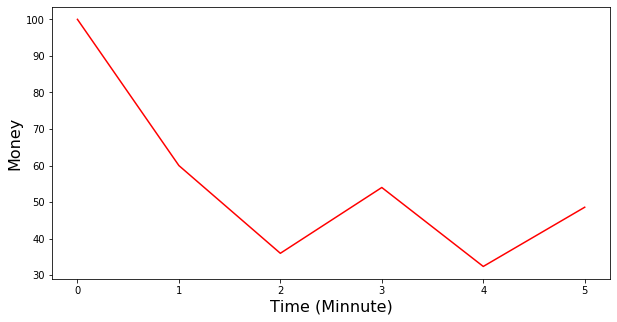

In [ ]:
n_time = 5

plt.figure(figsize=(10,5))
plt.plot(range(n_time+1),get_sim(n_time,100), color='red')
plt.xlabel('Time (Minnute)',size=16)
plt.ylabel('Money',size=16)
plt.show()

# One long sequence for one hour

yscale is linear

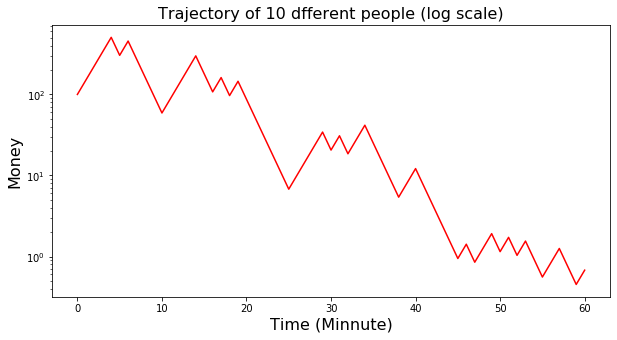

In [ ]:
n_time = 60

plt.figure(figsize=(10,5))
plt.plot(range(n_time+1),get_sim(n_time,100), color='red')
plt.title('Trajectory of 10 dfferent people (log scale)', size=16)
plt.xlabel('Time (Minnute)',size=16)
plt.ylabel('Money',size=16)
plt.yscale('log')
plt.show()

Through the above tractectory, we cannot find something meaningful but to see some ranomdness or noises.

# 10 Sequences / Trajectories

### We can think of it as trajectories of 10 people's wealth


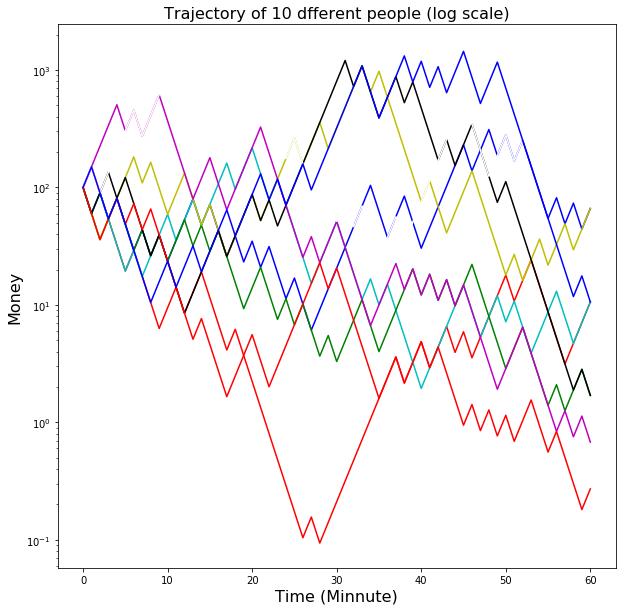

In [ ]:
n_ppl = 10
plt.figure(figsize=(10,10))
for i in range(n_ppl):
    plt.plot(range(n_time+1),get_sim(n_time,100), color="rbcgykmwrb"[i])
plt.title('Trajectory of 10 dfferent people (log scale)', size=16)
plt.xlabel('Time (Minnute)',size=16)
plt.ylabel('Money',size=16)
plt.yscale('log')
plt.show()

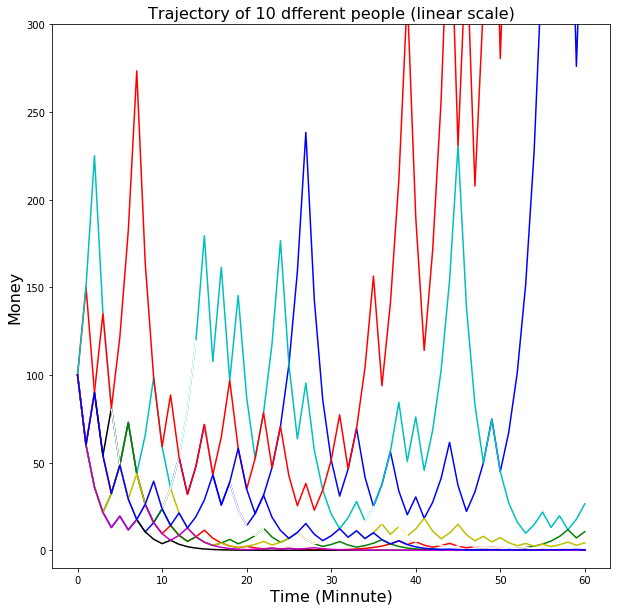

In [ ]:
n_ppl = 10
plt.figure(figsize=(10,10))
for i in range(n_ppl):
    plt.plot(range(n_time+1),get_sim(n_time,100), color="rbcgykmwrb"[i])
plt.title('Trajectory of 10 dfferent people (linear scale)', size=16)
plt.xlabel('Time (Minnute)',size=16)
plt.ylabel('Money',size=16)
plt.ylim([-10,300])
#plt.yscale('log')
plt.show()

## 50 Sequences

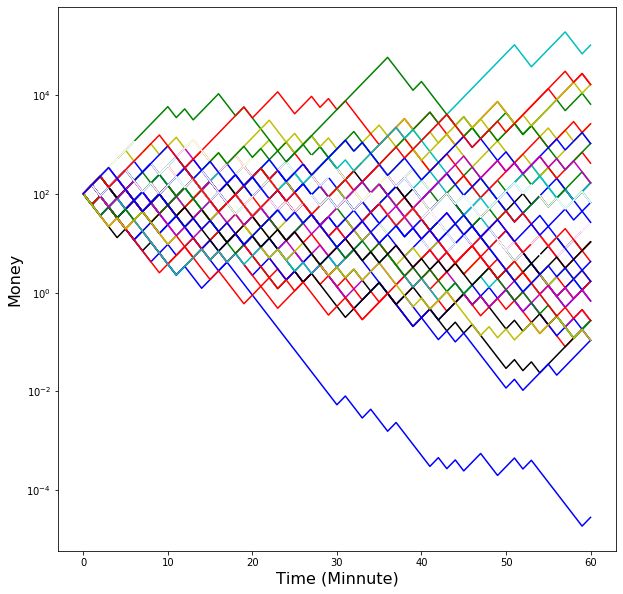

In [ ]:
np.random.seed(1234)
n_ppl = 50
n_time = 60
plt.figure(figsize=(10,10))
for i in range(n_ppl):
    plt.plot(range(n_time+1),get_sim(n_time,100), color="rbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrb"[i])
plt.xlabel('Time (Minnute)',size=16)
plt.ylabel('Money',size=16)
#plt.ylim([1,500])
plt.yscale('log')
plt.show()

# Ensemble Average of 30 Sequences ( 3 times )



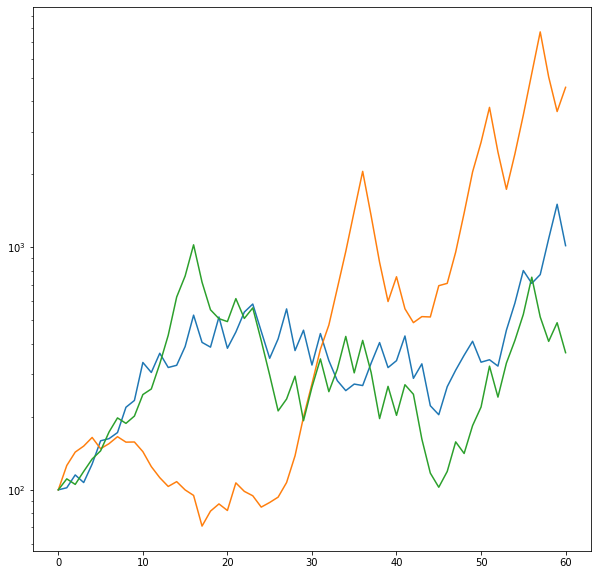

In [ ]:
np.random.seed(1234)
n_ppl = 30
n_time = 60

plt.figure(figsize=(10,10))
for i in range(3):
  df = np.empty([n_ppl,n_time+1])
  for i in range(n_ppl):
      df[i,:] = get_sim(n_time,100)
  plt.plot(range(n_time+1),np.mean(df,axis=0))
  plt.yscale('log')

# Ensemble Average of 5000 Sequences ( 3 times )


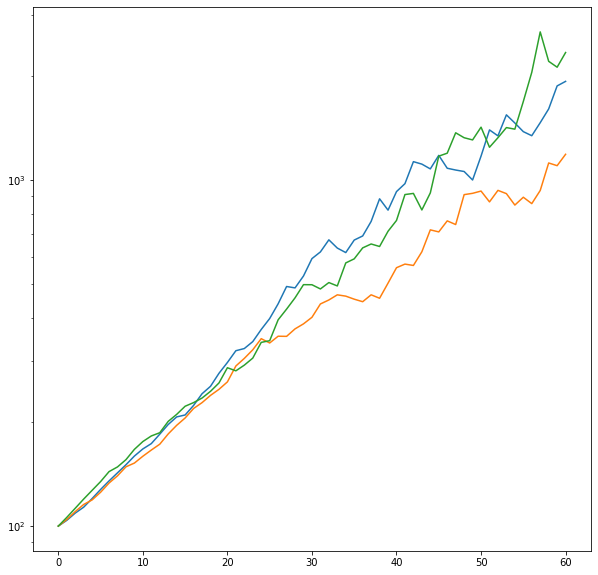

In [ ]:
np.random.seed(1234)
n_ppl = 5000
n_time = 60

plt.figure(figsize=(10,10))
for i in range(3):
  df = np.empty([n_ppl,n_time+1])
  for i in range(n_ppl):
      df[i,:] = get_sim(n_time,100)
  plt.plot(range(n_time+1),np.mean(df,axis=0))
  plt.yscale('log')

# Ensemble Average of 200,000 Sequences ( 3 times )

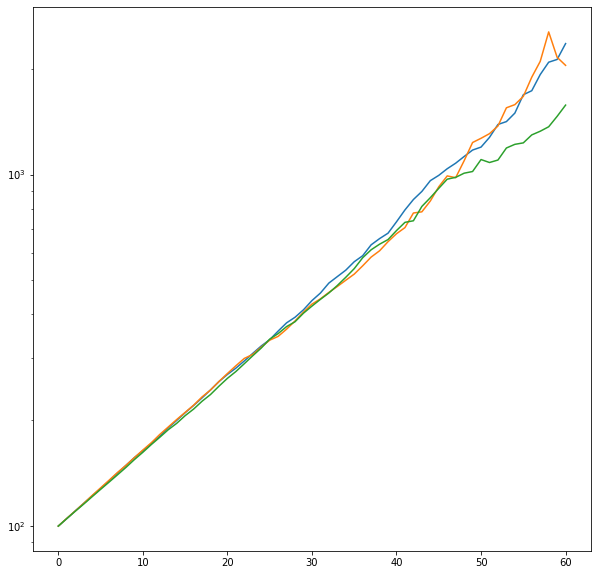

In [ ]:
np.random.seed(1234)
n_ppl = 200000
n_time = 60

plt.figure(figsize=(10,10))
for i in range(3):
  df = np.empty([n_ppl,n_time+1])
  for i in range(n_ppl):
      df[i,:] = get_sim(n_time,100)
  plt.plot(range(n_time+1),np.mean(df,axis=0))
  plt.yscale('log')

# We gain on average!!

But what does actually mean?

# Reality check

- We looked at ensemble-average so far

- Is this really Relevant to me? This is just an average. We dont have access to average. Me as an indiviaula represent just a one trajectory.

- Cannot go back in time/access parallel universes.

- Interested in one sequence/trajectory (reality)

# Denoise through time or people?

I am curious what happenes if we play very very long time.

In [ ]:
np.random.seed(2020)
n_time = 60*24*7*4*12 # one year
sim = get_sim(n_time,100)
avg_t = sim.cumsum() / (np.arange(sim.size)+1)
avg_t.shape

(483841,)

In [ ]:
sim.cumsum()

array([ 100.    ,  160.    ,  196.    , ..., 2532.6306, 2532.6306,
       2532.6306], dtype=float32)

# Time Avg over one day

We use expanding mean using cumsum

## Still noisy

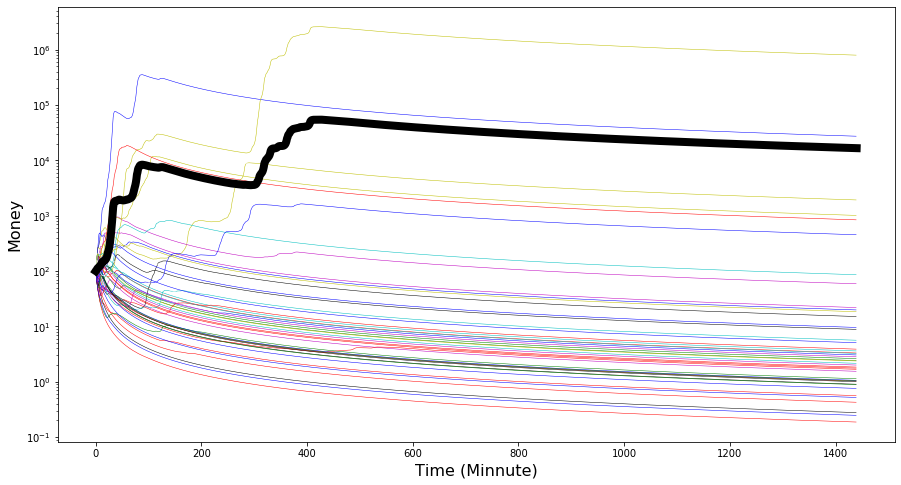

In [ ]:
plt.figure(figsize=(15,8))
np.random.seed(2020)
temp = np.ones((60*24+1,50))
for i in range(50):
  sim = get_sim(60*24,100)
  avg_t = sim.cumsum() / (np.arange(sim.size)+1)
  plt.plot(avg_t[0:min(60*24,n_time)], linewidth=0.5, color="rbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrb"[i])
  plt.xlabel('Time (Minnute)',size=16)
  plt.ylabel('Money',size=16)
  plt.yscale('log')
  #plt.xscale('log')
  temp[:,i] = avg_t
plt.plot(np.mean(temp, axis=1), linestyle='-', linewidth=8, color = 'black')
plt.show()

In [ ]:
np.mean(wealth, axis=1)

array([1.00000000e+02, 1.06800000e+02, 1.11060000e+02, ...,
       2.61092139e-16, 2.74387026e-16, 3.41229374e-16])

# Play for one week

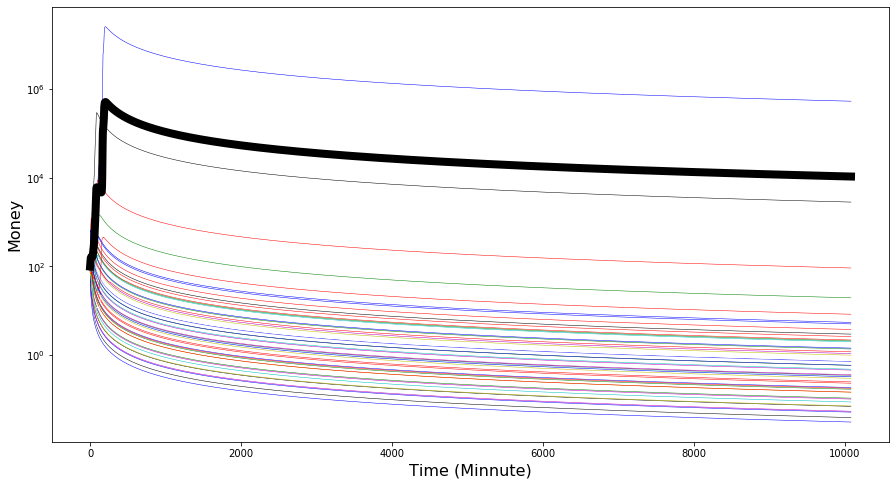

In [ ]:
plt.figure(figsize=(15,8))
np.random.seed(2020)
temp = np.ones((60*24*7+1,50))
for i in range(50):
  sim = get_sim(60*24*7,100)
  avg_t = sim.cumsum() / (np.arange(sim.size)+1)
  plt.plot(avg_t[0:min(60*24*7,n_time)], linewidth=0.5, color="rbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrbrbcgykmwrb"[i])
  plt.xlabel('Time (Minnute)',size=16)
  plt.ylabel('Money',size=16)
  plt.yscale('log')
  #plt.xscale('log')
  temp[:,i] = avg_t
plt.plot(np.mean(temp, axis=1), linestyle='-', linewidth=8, color = 'black')
plt.show()

# Play for one month of individual

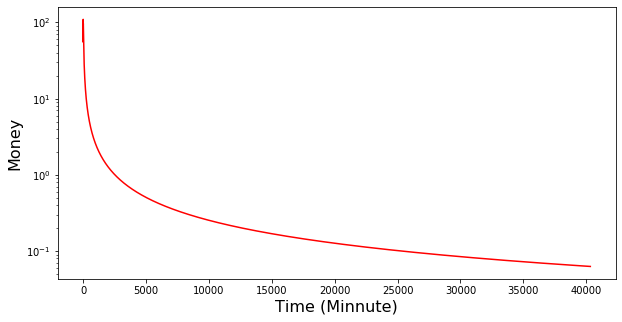

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(avg_t[0:min(60*24*7*4,n_time)], color='red')
plt.xlabel('Time (Minnute)',size=16)
plt.ylabel('Money',size=16)
plt.yscale('log')
#plt.xscale('log')
plt.show()

# Play for one year of individual

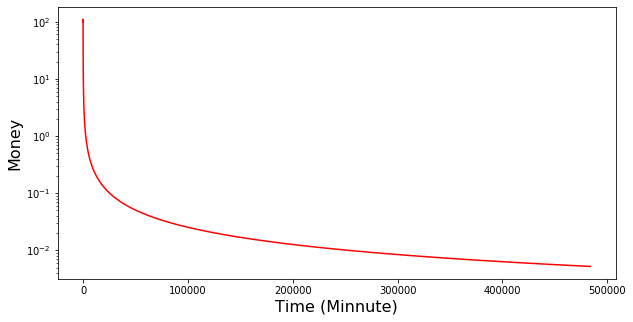

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(avg_t[0:min(60*24*7*4*12,n_time)], color='red')
plt.xlabel('Time (Minnute)',size=16)
plt.ylabel('Money',size=16)
plt.yscale('log')
#plt.xscale('log')
plt.show()

In [ ]:
np.min(avg_t)

0.0052344274570248804

# This is Non-ergodic Game

# What is ergodic?

## In Physics:

a) Ensemble perspective:

Esnemble size $\rightarrow \infty$ to remove randomness.

b)  Time perspective:

Time $\rightarrow \infty$ to remove randomness.

Physics-ergodicity: both perspectives equivalent

## In Economics:

Economic ergodicity: Laws of process don't change in time



# Histogram

# Question: How many people in the population have cetain amount of money

In [ ]:
n_ppl = 400000
n_time = 60


df = np.empty([n_ppl,n_time+1])
for i in range(n_ppl):
    df[i,:] = get_sim(n_time,100)

df[:,60].shape

(400000,)

# Time = 1

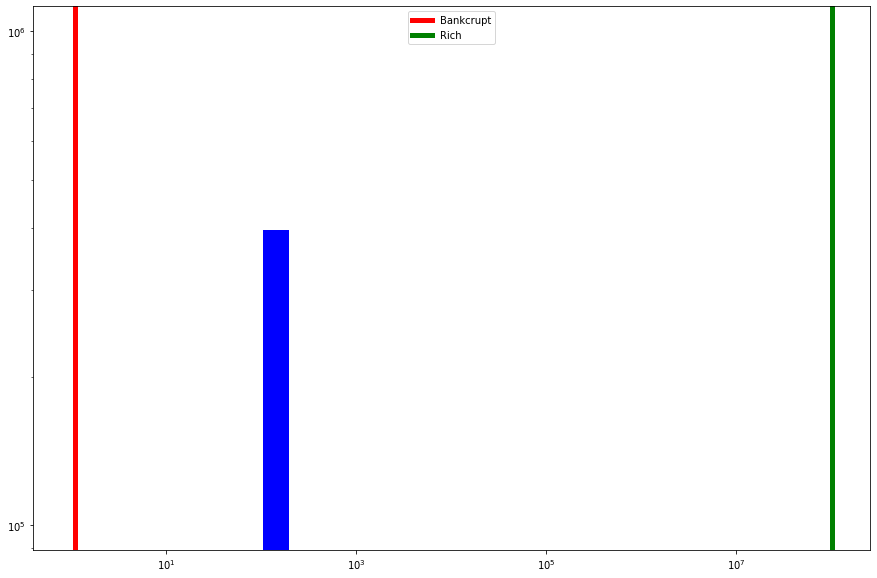

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df[:,0], bins=[0,1,100,200], color='blue', edgecolor='white', linewidth=3, log=True)
plt.xscale('log')
plt.axvline(x=1.1, color='r', linewidth=5, label='Bankcrupt')
plt.axvline(x=np.max(df), color='g', linewidth=5, label = "Rich")
plt.legend(loc="upper center")
plt.show()

# Time = 60

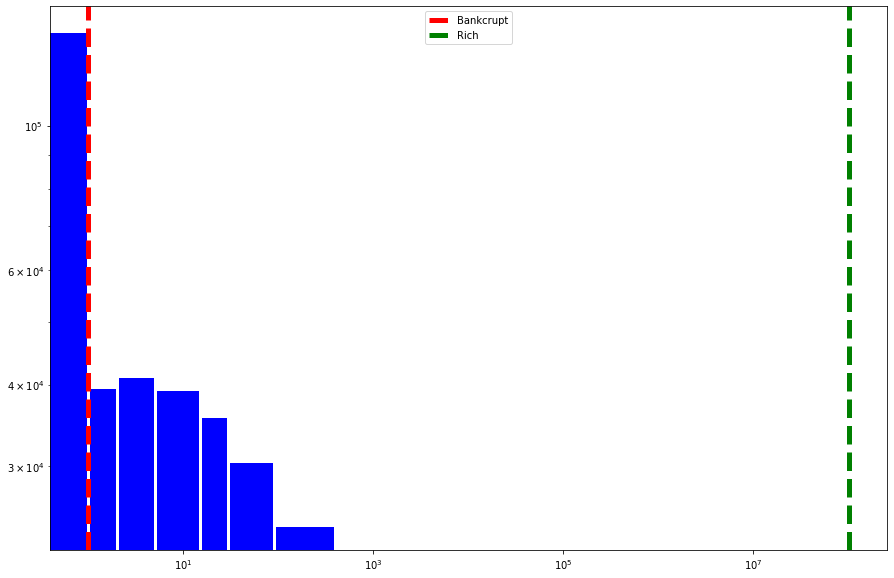

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df[:,60], bins=[0, 1, 2, 5, 15, 30, 90, 400], color='blue', edgecolor='white', linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=1, color='r', linewidth=5, linestyle ='--', label='Bankcrupt')
plt.axvline(x=np.max(df), color='g', linestyle ='--', linewidth=5, label = "Rich")
plt.legend(loc="upper center")
plt.show()

In [ ]:
pd.Series(df[:,60]).quantile(np.linspace(.1, 1, 9, 0))

0.1      0.043409
0.2      0.271303
0.3      0.678259
0.4      1.695646
0.5      4.239116
0.6     10.597790
0.7     26.494474
0.8     66.236185
0.9    413.976155
dtype: float64

In [ ]:
np.linspace(.1, 1, 9, 0)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Leverage Problem

Let's think about a situation where we keep some money safe. Beforehand, we put all our money (100$) into the game. This is a case where the leverage is 100%. 

Imagine a very simple portfolio of value $x_l$, out of which $l \cdot x_l$ is invested in stock and the remainder, $(1-l)x_l$ is put in the bank. $l$ is known as the leverage. It is the fraction of the total investment assigned to the risky asset. $l = 0$ corresponds to a portfolio consisting only of bank deposits. $l=1$ corresponds to a portfolio only of stock. 

Note: I refer to R.Nagler's code to this implementation. [Click to R.Nagler's Code](https://github.com/rnagler/coinrun3/blob/master/coinrun3.ipynb)

In [ ]:
n_ppl = 1000000
n_time = 60*24 # one day
init = 100
tax = 0
lev = 1
w_factor = 0.5
l_factor = -0.4

total_wealth_t = np.zeros((n_time+1), dtype=np.float32) # wealth of all people at time t
total_wealth_t[0] = init*n_ppl

bank = np.zeros((n_time+1), dtype=np.float32) # wealth of bank at time t

ensem_avg_t = np.zeros((n_time+1), dtype=np.float32)
ensem_avg_t[0] = init

avg_win_t = np.zeros((n_time+1), dtype=np.float32) # average win of Round

indivTax = np.zeros((n_time), dtype=np.float32) # collected tax at time t
roundErr = np.zeros((n_time+1), dtype=np.float32) # rounding error in current Round



In [ ]:
start_time = time()
np.random.seed(2020)
factors = np.zeros((n_time,n_ppl), dtype=np.float32)
for t in range(0,n_time):
  for p in range(0,n_ppl):
    factors[t,p] = random.choice([1+l_factor,1+w_factor]) # random multipliers
end_time = time()
factors.shape
print("total time taken", end_time - start_time)

total time taken 1632.1775634288788


In [ ]:
fname = 'factors_1m_oneday.npy'
#np.save(fname, factors)

In [ ]:
factors.shape

(1440, 1000000)

# Save it to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/'
%ls

/content/drive/My Drive
 Colab_DARNN_Roh_Dec.ipynb   full_non_padding.csv
'Colab Notebooks'/          'The ergodicity problem in economics.ipynb'
 factors_1m_oneday.npy


In [ ]:
fname = 'factors_1m_oneday.npy'
factors = np.load(fname)

In [ ]:
# wealth = np.empty([n_time+1,n_ppl], dtype=np.float32)
# wealth[0,:] = init

# # wealth[t,p] == wealth of people 'p' in time 't'. 
# start_time = time()
# for t in range(n_time):
#   wealth[t+1,:] = (wealth[t,:]*(1-lev)) + (wealth[t,:]*factors[t,:]*lev) # from t to t+1 with leverage
#   indivTax = wealth[t,:] * tax # wealth tax from last round for each player
#   welfare = np.sum(indivTax) / n_ppl # take to be redistributed
#   wealth[t+1,:] = wealth[t+1,:] + (welfare - indivTax)
#   total_wealth_t[t+1] = np.sum(wealth[t+1,:]) # sum over each time (row)
#   avg_win_t[t+1] = (total_wealth_t[t+1] - total_wealth_t[t]) / n_ppl 
#   ensem_avg_t[t+1] = total_wealth_t[t+1]/n_ppl
  
#   bank[t+1] = bank[t] + total_wealth_t[t] - total_wealth_t[t+1]
#   roundErr[t+1] = total_wealth_t[t+1] + bank[t+1]
# end_time = time()
# print("total time taken", end_time - start_time)
# wealth.shape

total time taken 66.87762069702148


(1441, 1000000)

In [ ]:
def get_summary_graph(n_time, init, lev, tax, ensem_avg_t, avg_win_t):

    wealth = np.empty([n_time+1,n_ppl], dtype=np.float32)
    wealth[0,:] = init

    # wealth[t,p] == wealth of people 'p' in time 't'. 
    start_time = time()
    for t in range(n_time):
      wealth[t+1,:] = (wealth[t,:]*(1-lev)) + (wealth[t,:]*factors[t,:]*lev) # from t to t+1 with leverage
      indivTax = wealth[t,:] * tax # wealth tax from last round for each player
      welfare = np.sum(indivTax) / n_ppl # take to be redistributed
      wealth[t+1,:] = wealth[t+1,:] + (welfare - indivTax)
      total_wealth_t[t+1] = np.sum(wealth[t+1,:]) # sum over each time (row)
      avg_win_t[t+1] = (total_wealth_t[t+1] - total_wealth_t[t]) / n_ppl 
      ensem_avg_t[t+1] = total_wealth_t[t+1]/n_ppl
      
      bank[t+1] = bank[t] + total_wealth_t[t] - total_wealth_t[t+1]
      roundErr[t+1] = total_wealth_t[t+1] + bank[t+1]
    end_time = time()
    print("total time taken", end_time - start_time)

    plt.figure(figsize=(10,8))
    plt.plot(ensem_avg_t[0:min(100, n_time)])
    plt.title('Trajectory of Ensemble average of 1 million dfferent people (log scale)', size=20)
    plt.xlabel('Time (Minnute)',size=16)
    plt.ylabel('Money',size=16)
    plt.yscale('log')
    plt.show()
 
    plt.figure(figsize=(10,8))
    plt.plot(wealth[:,np.random.randint(1,n_ppl)].cumsum()/(np.arange(n_time+1)+1))
    plt.title('Trajectory of Time average of One Individual', size=20)
    plt.xlabel('Time (Minnute)',size=16)
    plt.ylabel('Money',size=16)
    plt.yscale('log')
    plt.show()

    plt.figure(figsize=(10,8))
    plt.plot(avg_win_t[1:])
    plt.title('Trajectory of Average Win each Time', size=20)
    plt.xlabel('Time (Minnute)',size=16)
    plt.ylabel('Money',size=16)
    #plt.yscale('log')
    plt.show()

    plt.figure(figsize=(10,8))
    maxP = np.argmax(wealth[n_time,:])
    plt.plot(wealth[:,maxP])
    plt.title('Trajectory of Bill Gates', size=20)
    plt.xlabel('Time (Minnute)',size=16)
    plt.ylabel('Money',size=16)
    plt.yscale('log')
    plt.show()


# Case1: Leverage: 100% / Tax: 0 / Oneday

- Result is same as above

total time taken 20.504796743392944


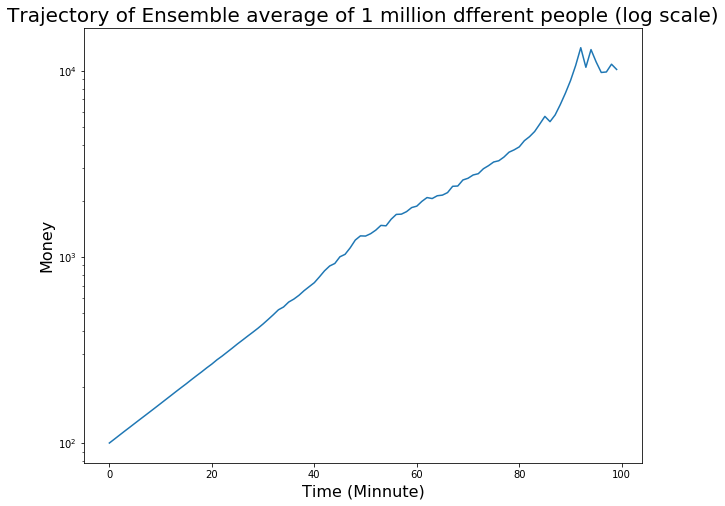

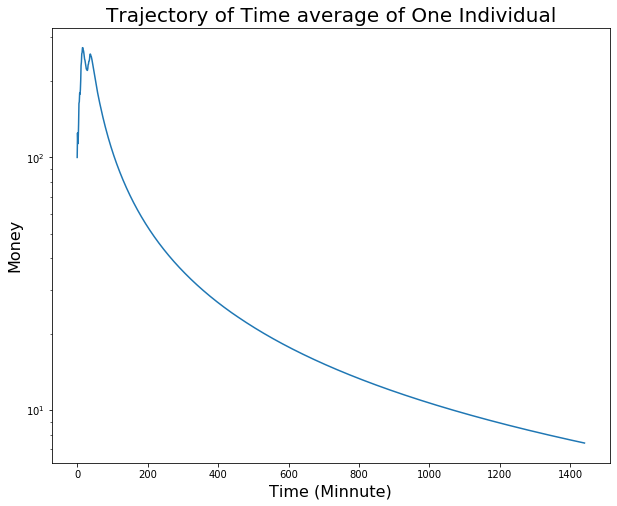

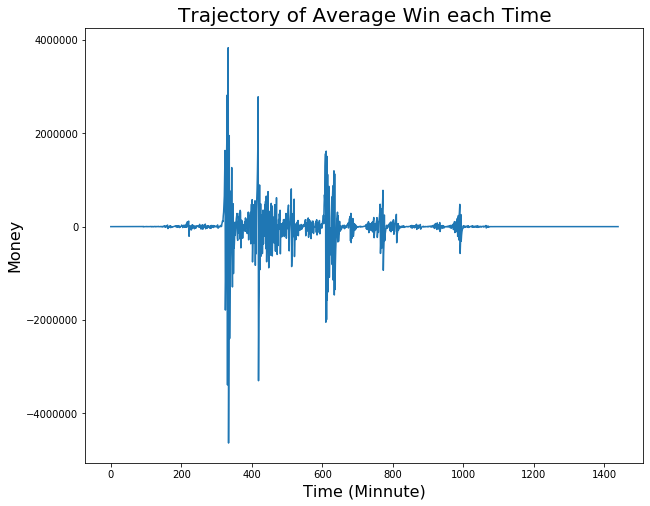

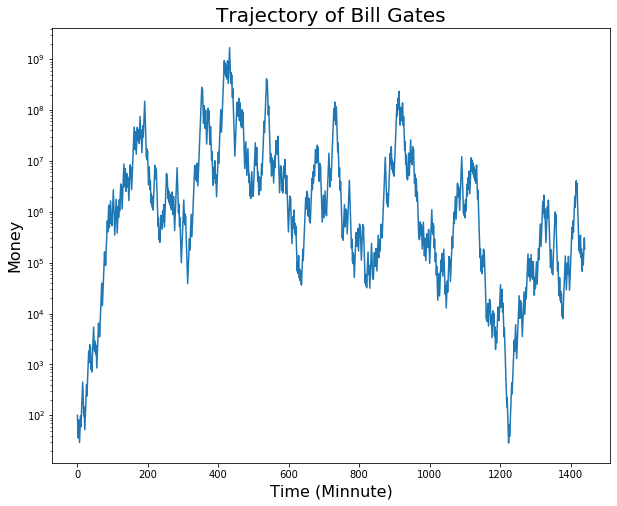

In [ ]:
n_ppl = 1000000
n_time = 60*24 # one day
init = 100
lev = 1
tax = 0
get_summary_graph(n_time, init, lev, tax, ensem_avg_t, avg_win_t)

# Case2: Leverage: 75% / Tax: 0

total time taken 13.087040185928345


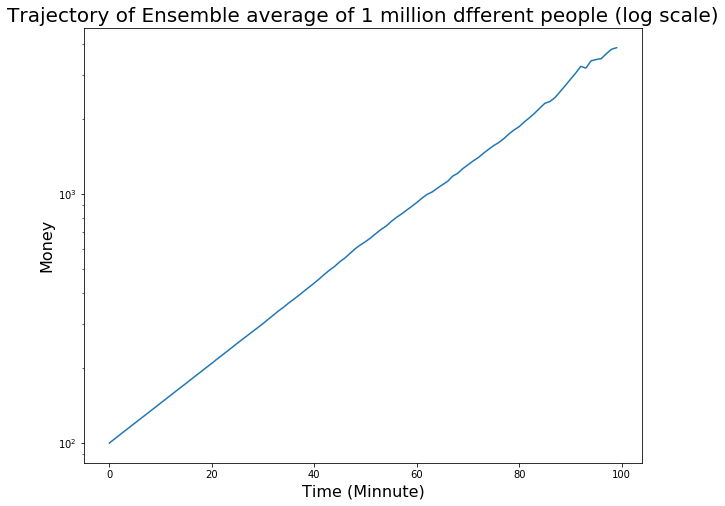

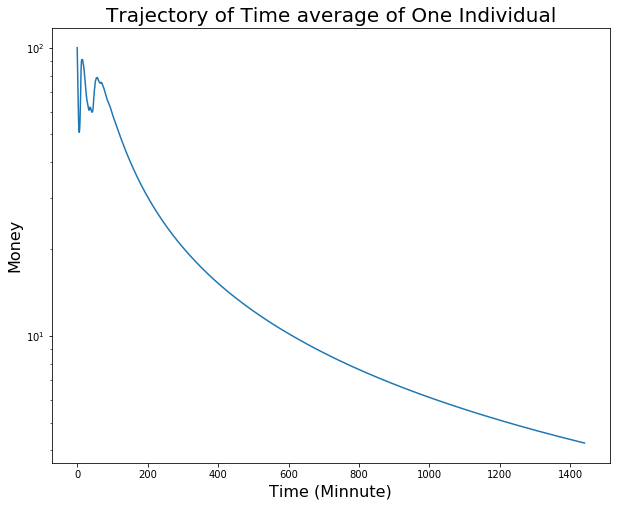

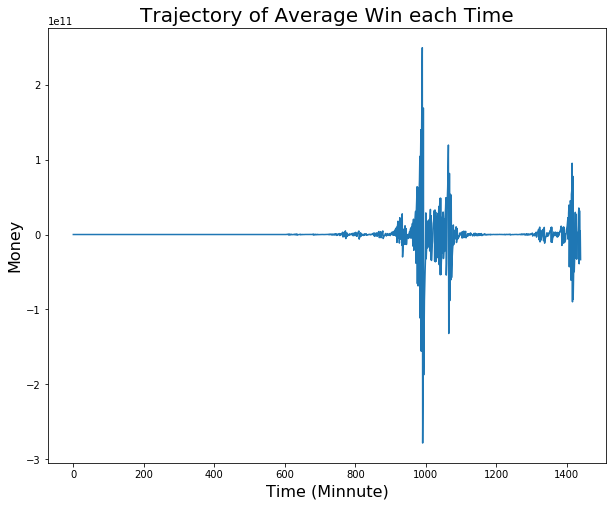

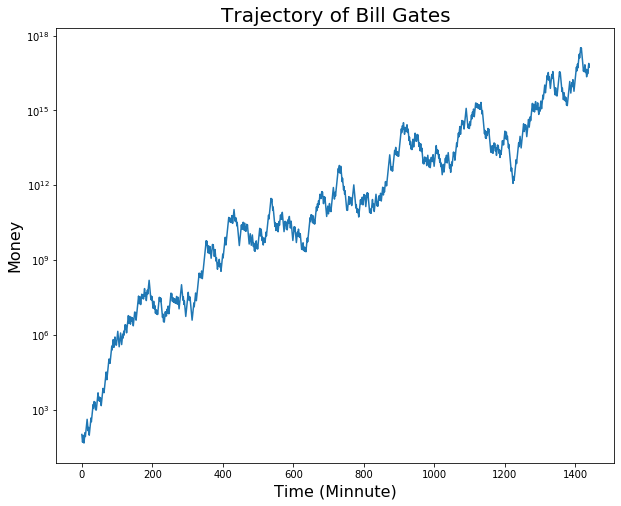

In [ ]:
n_ppl = 1000000
n_time = 60*24 # one day
init = 100
lev = 0.75
tax = 0
get_summary_graph(n_time, init, lev, tax, ensem_avg_t, avg_win_t)

# Case3: Leverage: 50% / Tax: 0

total time taken 12.396856307983398


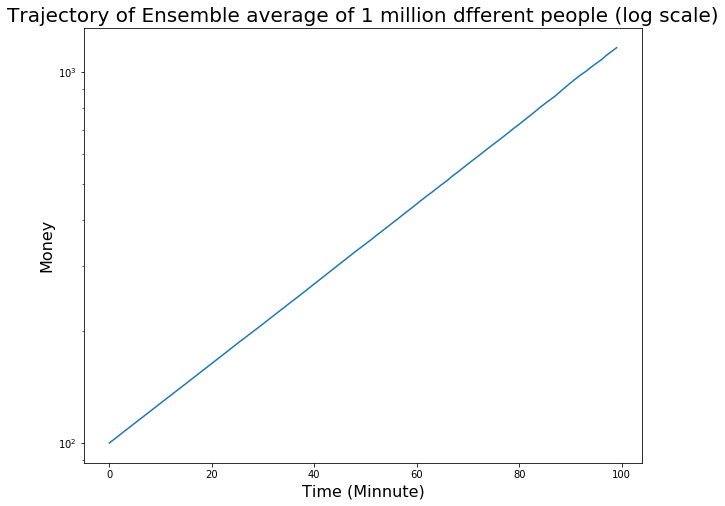

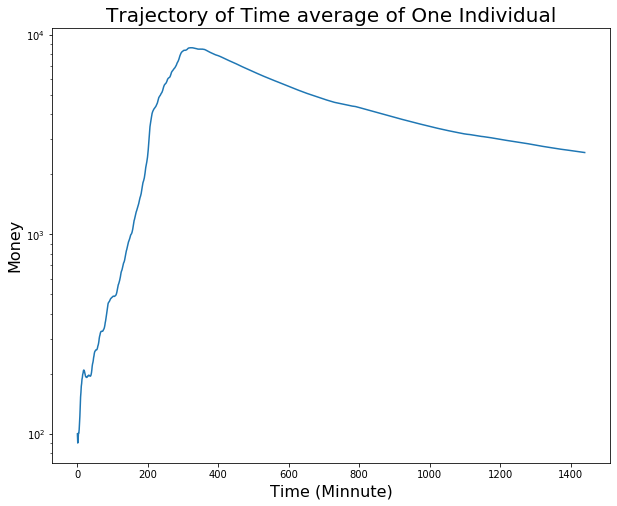

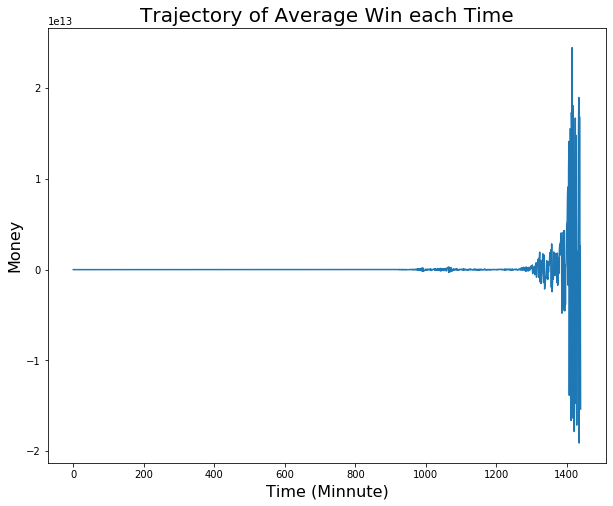

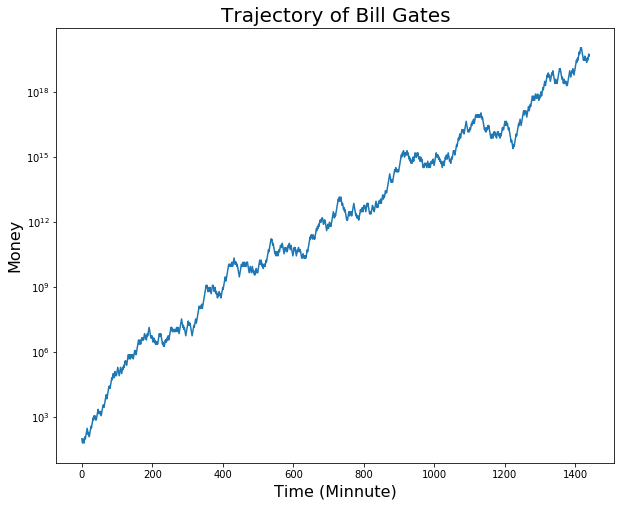

In [ ]:
n_ppl = 1000000
n_time = 60*24 # one day
init = 100
lev = 0.5
tax = 0
get_summary_graph(n_time, init, lev, tax, ensem_avg_t, avg_win_t)

# Case4: Leverage: 25% / Tax:0

total time taken 26.185111045837402


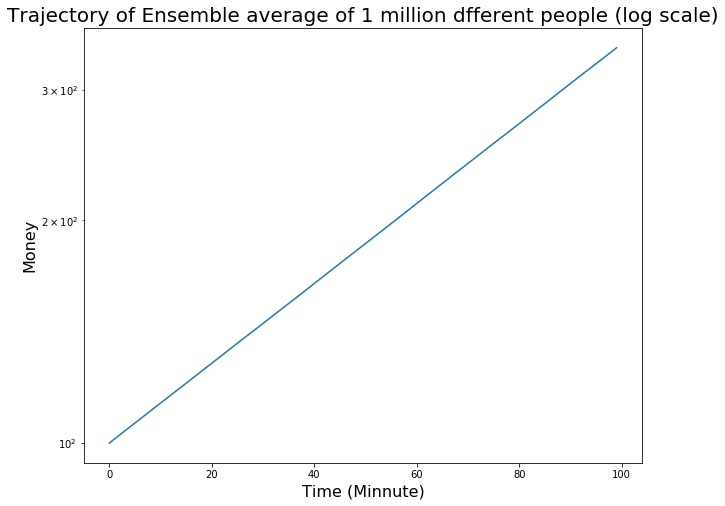

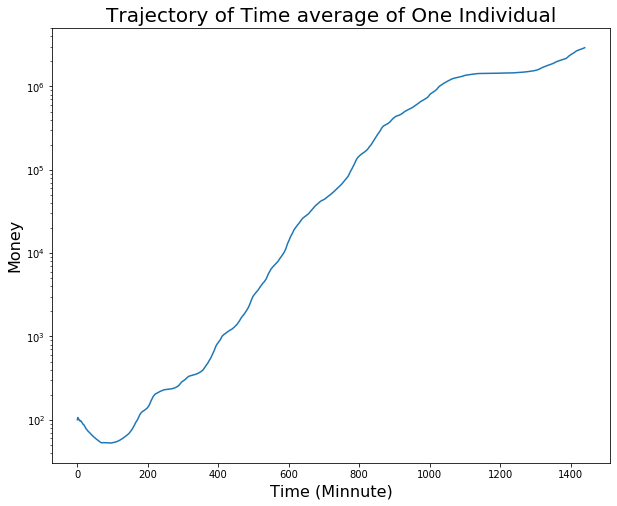

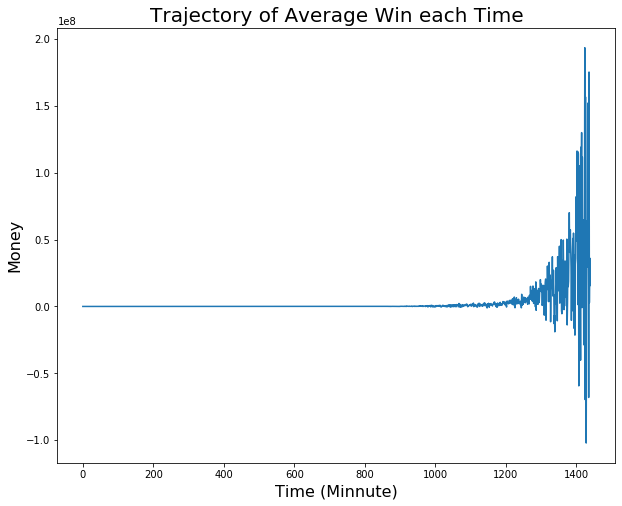

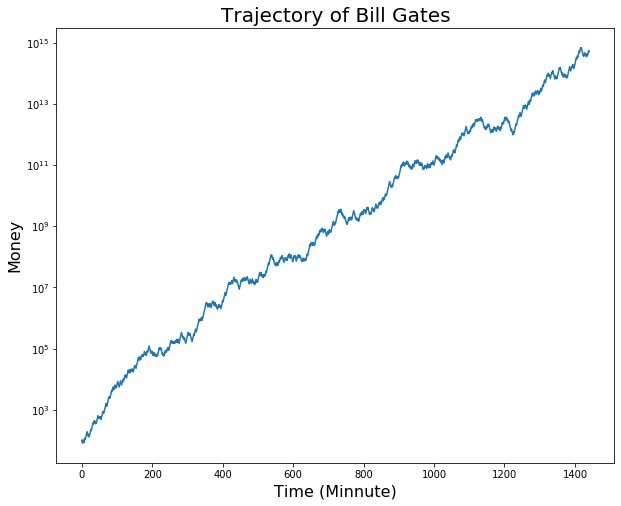

In [ ]:
n_ppl = 1000000
n_time = 60*24 # one day
init = 100
lev = 0.25
tax = 0
get_summary_graph(n_time, init, lev, tax, ensem_avg_t, avg_win_t)